In [1]:
from util import load_user_data
import pandas as pd
import numpy as np

In [2]:
valid_users, tp_data, _ = load_user_data(filename="../data/xailabdata_all.csv")
valid_users_2, tp_data_2, _ = load_user_data(filename="../data/xailabdata_llm_agent.csv")

valid_users = valid_users | valid_users_2
tp_data.update(tp_data_2)
variable_dict = {}
variable_dict["condition"] = []
dimensions = ["accuracy", "agreement_fraction", "switch_fraction", "accuracy-wid", "RAIR", "RSR"]
all_conditions = ["Control", "Dashboard", "CXAI", "ECXAI", "LLM Agent"]
for dimension in dimensions:
    variable_dict[dimension] = []

for user in valid_users:
    tp_condition = tp_data[user]["condition"]
    variable_dict["condition"].append(tp_condition)
    reliance_measures = tp_data[user]["reliance_measures"]
    for dimension in dimensions:
        variable_dict[dimension].append(reliance_measures[dimension])

df = pd.DataFrame(variable_dict)
print(df.shape)

condition_name_map = {
    "control": "Control",
    "dashboard": "Dashboard",
    "chatxai": "CXAI",
    "chatxaiboost": "ECXAI",
    "chatxaiAuto": "LLM Agent"
}

df['condition'] = df['condition'].map(condition_name_map)

245 valid participants
{'control': 61, 'dashboard': 61, 'chatxai': 62, 'chatxaiboost': 61, 'chatxaiAuto': 0}
91 participants blindly rely on AI advice
{'control': 8, 'dashboard': 27, 'chatxai': 32, 'chatxaiboost': 24, 'chatxaiAuto': 0}
61 valid participants
{'control': 0, 'dashboard': 0, 'chatxai': 0, 'chatxaiboost': 0, 'chatxaiAuto': 61}
25 participants blindly rely on AI advice
{'control': 0, 'dashboard': 0, 'chatxai': 0, 'chatxaiboost': 0, 'chatxaiAuto': 25}
(306, 7)


In [3]:
df.head()

,condition,accuracy,agreement_fraction,switch_fraction,accuracy-wid,RAIR,RSR
0,ECXAI,0.7,1.0,1.000000,0.500000,1.0,0.000000
1,CXAI,0.7,1.0,1.000000,0.500000,1.0,0.000000
2,Control,0.8,0.9,0.750000,0.750000,1.0,0.500000
3,ECXAI,0.5,0.6,0.333333,0.166667,0.0,0.333333
4,Control,0.7,1.0,1.000000,0.500000,1.0,0.000000


In [4]:
import dabest
# df["condition"].unique()

four_groups_unpaired = {}
for reliance_measure in dimensions:
    four_groups_unpaired[reliance_measure] = dabest.load(df, x="condition", idx=all_conditions, y=reliance_measure, resamples=5000, ci=95, x1_level=all_conditions)

In [5]:
four_groups_unpaired["RAIR"].mean_diff

DABEST v2023.02.14
                  
Good afternoon!
The current time is Mon Sep 30 15:52:55 2024.

The unpaired mean difference between Control and Dashboard is 0.157 [95%CI 0.00367, 0.304].
The p-value of the two-sided permutation t-test is 0.0446, calculated for legacy purposes only. 

The unpaired mean difference between Control and CXAI is 0.254 [95%CI 0.0999, 0.397].
The p-value of the two-sided permutation t-test is 0.0012, calculated for legacy purposes only. 

The unpaired mean difference between Control and ECXAI is 0.17 [95%CI 0.0175, 0.314].
The p-value of the two-sided permutation t-test is 0.0264, calculated for legacy purposes only. 

The unpaired mean difference between Control and LLM Agent is 0.132 [95%CI -0.0232, 0.277].
The p-value of the two-sided permutation t-test is 0.0834, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing thee

/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/dabest/plotter.py:473: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 45.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/

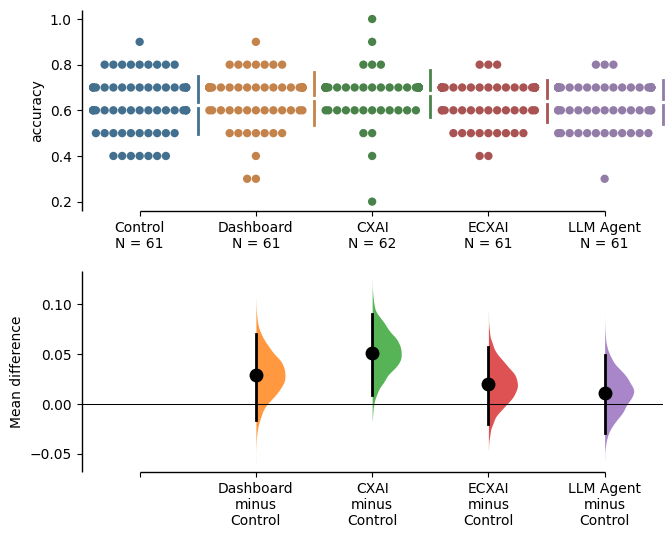

/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Us

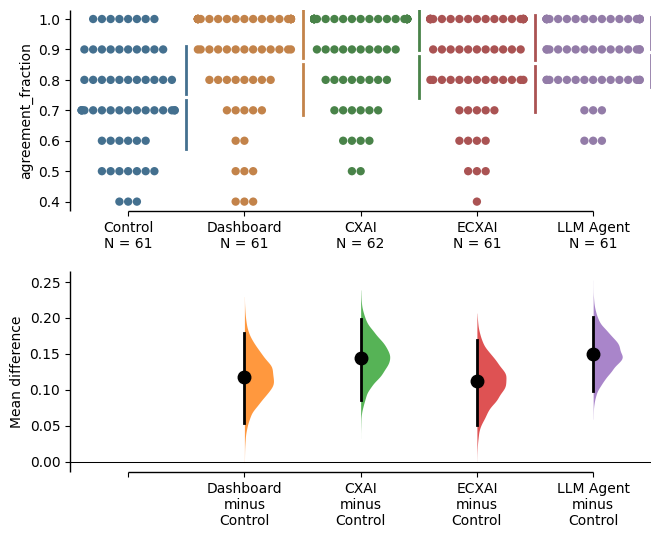

/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


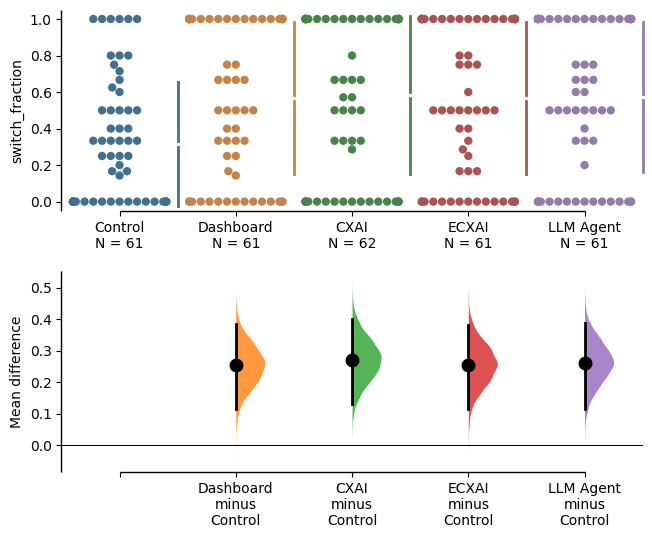

/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


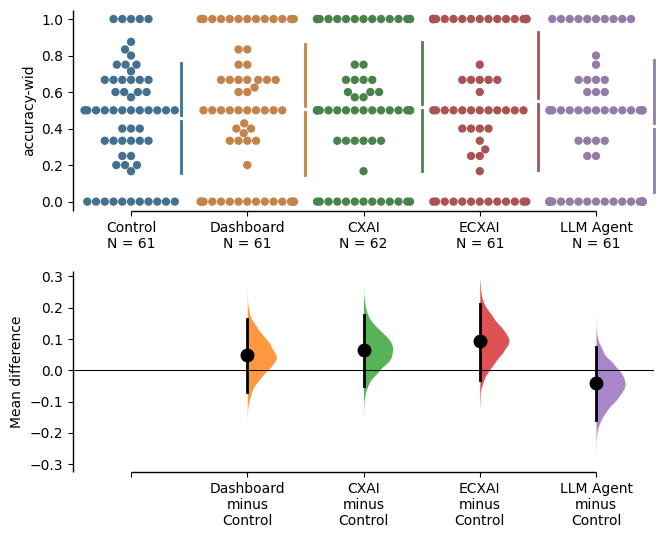

/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 46.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

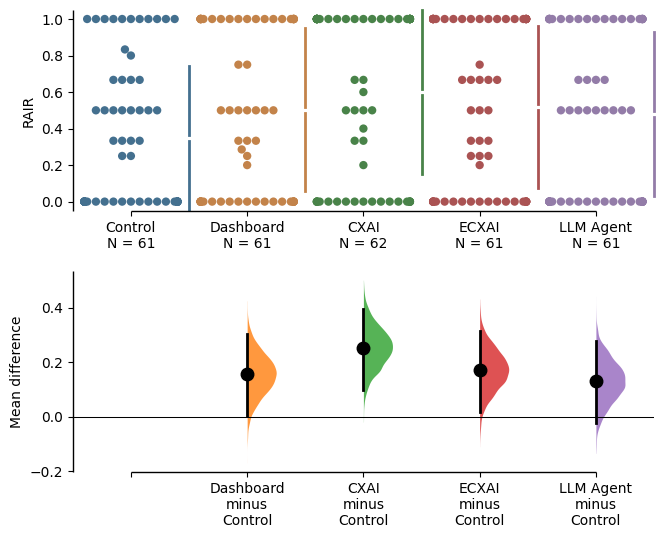

/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

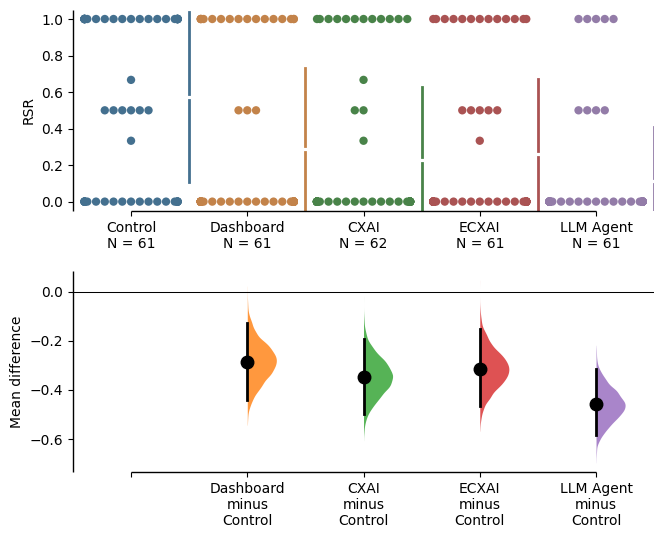

In [6]:
for reliance_measure in dimensions:
    four_groups_unpaired[reliance_measure].mean_diff.plot();